# Model learning

## KOSPI

In [33]:
import matplotlib.pyplot as plt 
import pandas as pd

In [15]:
kospi = pd.read_csv('./data/v1/kospi.csv', header=None, sep="\t") 
kospi.head()

,0,1,2,3,4,5
0,2015-11-04,"2,054","2,056","2,042","2,053","545,085"
1,2015-11-05,"2,049","2,050","2,040","2,049","349,079"
2,2015-11-06,"2,048","2,055","2,038","2,041","465,030"
3,2015-11-09,"2,039","2,039","2,023","2,026","435,389"
4,2015-11-10,"2,015","2,015","1,989","1,997","417,457"


In [25]:
kospi.dtypes

0    datetime64[ns]
1            object
2            object
3            object
4            object
5            object
dtype: object

In [28]:
kospi.columns = ['date', 'open', 'high', 'low', 'close', 'volume']
kospi.dropna(inplace=True)
kospi

,date,open,high,low,close,volume
0,2015-11-04,"2,054","2,056","2,042","2,053","545,085"
1,2015-11-05,"2,049","2,050","2,040","2,049","349,079"
2,2015-11-06,"2,048","2,055","2,038","2,041","465,030"
3,2015-11-09,"2,039","2,039","2,023","2,026","435,389"
4,2015-11-10,"2,015","2,015","1,989","1,997","417,457"
...,...,...,...,...,...,...
595,2018-04-09,"2,424","2,446","2,424","2,444","334,424"
596,2018-04-10,"2,440","2,454","2,420","2,451","356,390"
597,2018-04-11,"2,457","2,459","2,441","2,444","355,187"
598,2018-04-12,"2,451","2,455","2,442","2,443","441,568"


In [29]:
import yfinance as yf

In [32]:
kospi = yf.download(tickers='^KS11', start='2018-01-01', end='2019-12-31')
kospi.head()

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2018-01-02,2474.860107,2481.020020,2465.939941,2479.649902,2479.649902,262200
2018-01-03,2484.629883,2493.399902,2481.909912,2486.350098,2486.350098,331100
2018-01-04,2502.500000,2502.500000,2466.449951,2466.459961,2466.459961,333800
2018-01-05,2476.850098,2497.520020,2475.510010,2497.520020,2497.520020,308800
2018-01-08,2510.699951,2515.370117,2494.179932,2513.280029,2513.280029,311400


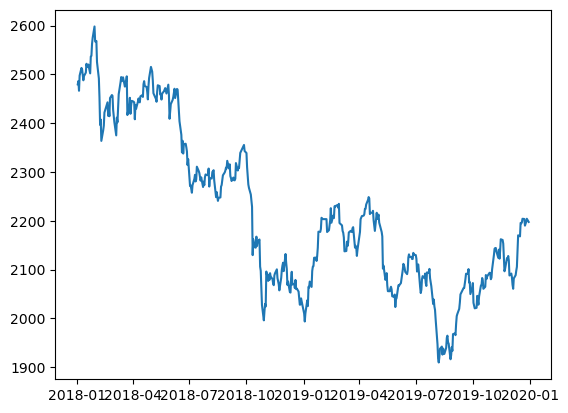

In [35]:
plt.plot(kospi['Close'])

In [49]:
# KOSPI MDD
1 - (min(kospi['Close']) / max(kospi['Close']))

0.2649844684165452

## Samsung Electronics

In [40]:
# 삼성전자
samsung = yf.download(tickers='005930.KS', start='2018-01-01', end='2019-12-31')
samsung.head()

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2018-01-02,51380.0,51400.0,50780.0,51020.0,43523.707031,8474250
2018-01-03,52540.0,52560.0,51420.0,51620.0,44035.542969,10013500
2018-01-04,52120.0,52180.0,50640.0,51080.0,43574.878906,11695450
2018-01-05,51300.0,52120.0,51200.0,52120.0,44462.085938,9481150
2018-01-08,52400.0,52520.0,51500.0,52020.0,44376.773438,8383650


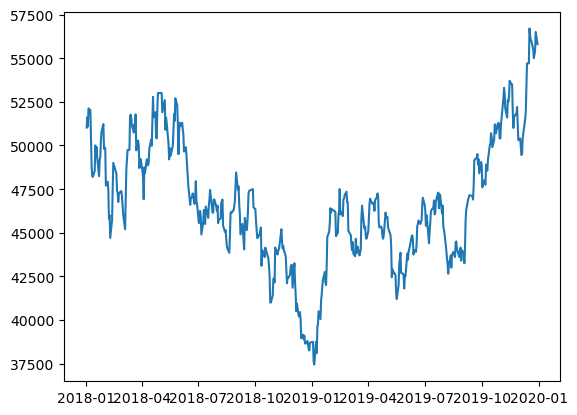

In [44]:
plt.plot(samsung['Close'])

In [45]:
# 삼성전자 MDD
1 - (min(samsung['Close']) / max(samsung['Close']))

0.3395061728395061

In [47]:
# buy and hold return ratio
(samsung['Close'][-1] - samsung['Close'][0]) / samsung['Close'][0]

0.09368874950999607

In [62]:
def get_data(code='005930.KS', start_date='2018-01-01', end_date='2019-12-31'):
    df = yf.download(tickers=code, start=start_date, end=end_date)
    plt.plot(df['Close'])
    print('MDD: ', 1 - (min(df['Close']) / df['Close'][0]))
    print('Buy and Hold return: ', (df['Close'][-1] - df['Close'][0]) / df['Close'][0])
    

[*********************100%%**********************]  1 of 1 completed
MDD:  0.3395061728395061
Buy and Hold return:  0.09368874950999607


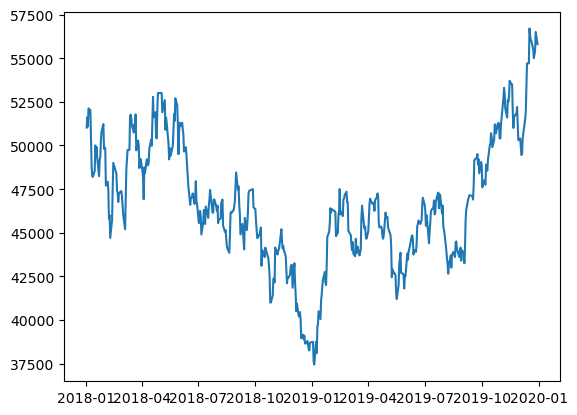

In [56]:
get_data(code='005930.KS')

## 현대자동차

[*********************100%%**********************]  1 of 1 completed
MDD:  0.4341463414634147
Buy and Hold return:  -0.1939799331103679


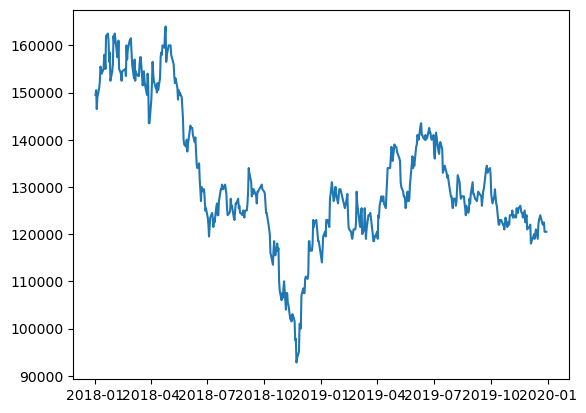

In [57]:
get_data(code='005380.KS')

## 카카오 (035720)

[*********************100%%**********************]  1 of 1 completed
MDD:  0.45078370957689784
Buy and Hold return:  0.04778156206125272


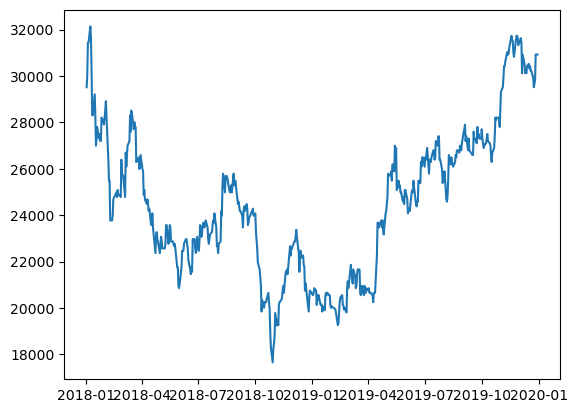

In [58]:
get_data(code='035720.KS')

# 테스트 모드 예시

## KOSPI

[*********************100%%**********************]  1 of 1 completed
MDD:  0.32987303658927514
Buy and Hold return:  0.36892749039900796


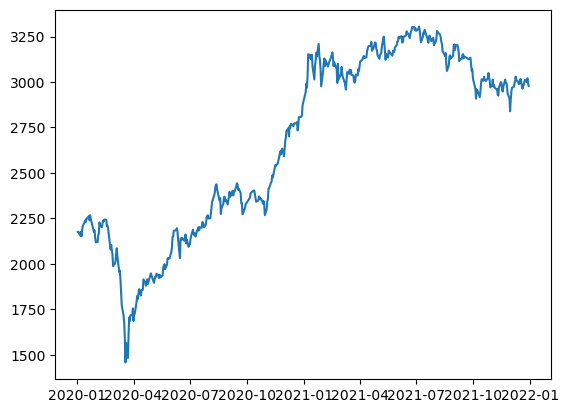

In [63]:
get_data(code='^KS11', start_date='2020-01-01', end_date='2021-12-31')

## 테스트 모드 결과 1 : 삼성전자 (005930)

[*********************100%%**********************]  1 of 1 completed
MDD:  0.23007246376811596
Buy and Hold return:  0.41847826086956524


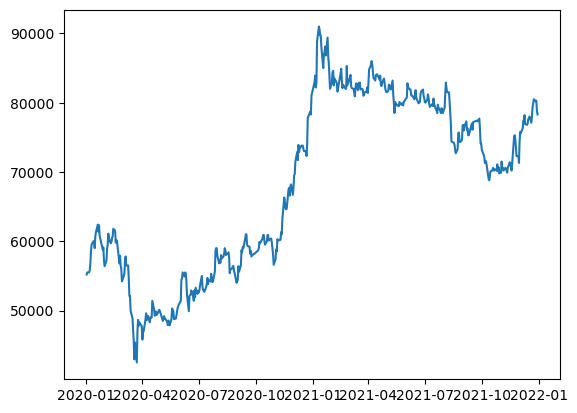

In [64]:
get_data(code='005930.KS', start_date='2020-01-01', end_date='2021-12-31')

## 테스트 모드 결과 : 현대차 (005380)

[*********************100%%**********************]  1 of 1 completed
MDD:  0.44152542372881354
Buy and Hold return:  0.7711864406779662


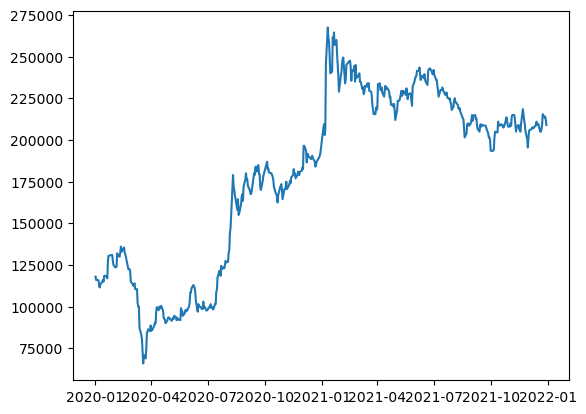

In [65]:
get_data(code='005380.KS', start_date='2020-01-01', end_date='2021-12-31')

## 테스트 모드 결과 3 : 카카오 (035720)

[*********************100%%**********************]  1 of 1 completed
MDD:  0.121311487915295
Buy and Hold return:  2.688524607880001


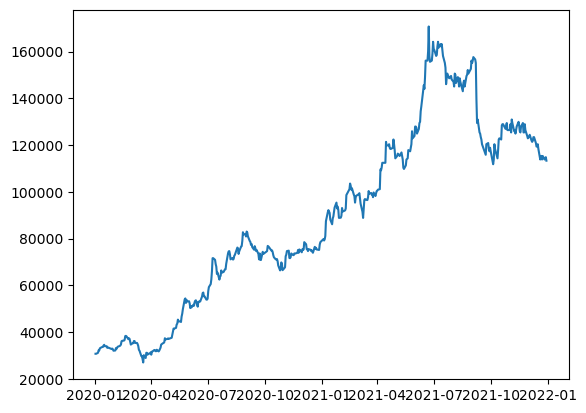

In [66]:
get_data(code='035720.KS', start_date='2020-01-01', end_date='2021-12-31')